# Trading Using Google Trends

Several years ago, a paper titled Quantifying Trading Behavior in Financial Markets Using Google Trends was published in Scientific Reports. This paper asked this question: "Is it possible to predict efficient trading strategies based upon the frequency of certain words in Google searches?"

The authors went through a number of interesting steps involved in gathering data and performing analyses. They derived a set of financial keywords from the Financial Times website that they thought were good words for examining patterns of search for financial information.

With this, they built a robust set of keywords using Google Sets (which is now defunct). Using those keywords, they collected Google Trends data on those words over a period of years and defined a trading execution plan to buy or sell based upon the changes in the search history on all of their terms. They ran the strategies for all the keywords and ranked the value of their investments for each search phrase.

What was their conclusion? It appears to be very likely that this can be used to beat random investment in the S&P 500 index. This result is perhaps debatable, but the process itself is an interesting one to attempt using pandas. It demonstrates the bringing in of historical data from multiple sources and using the statistical analysis of one stream of data to make decisions on investing and valuating a portfolio based on another stream.

In this session, we will investigate by gathering much of the data that they collected and in reproducing their results as closely as possible (and we will be very close to their results). All of the steps that they performed can be simply reproduced using pandas. Together, they provide an excellent example of social data collection and how it can be applied to make money. They also present a very interesting introduction to using pandas to develop trading strategies, which this book will now turn its attention to and run with for its remainder.

We will go through the following topics in detail:
- A brief summary of Quantifying Trading Behavior in Financial Markets Using Google Trends
- Retrieving trend data from Google Trends
- Obtaining Dow Jones Index data from Quandl
- Generating trade orders
- Calculating investment results
- Conclusions

# Notebook setup
The workbook and examples will all require the following code to execute and format output. It is similar to the previous sessions but also includes matplotlib imports to support many of the graphics that will be created, several options to fit data to the page in the text, the CSV (comma separated value) framework and the RE (regular expression) framework. Here's the code I am talking about:

In [6]:
# necessary imports for the workbook
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import pandas.io.data as wb,data
from pandas_datareader import wb

# A brief on Quantifying Trading Behavior in Financial Markets Using Google Trends

The authors of this paper state that financial markets are a prime target for investigating the prediction of market movements based upon the social habits of people searching for and gathering information to gain a competitive advantage in order to capture opportunities for personal financial gain.

They go on to investigate whether search query data from Google Trends can historically be used to provide insights into the information gathering process that leads up to making trading decisions in the stock market.

The authors gather data from Google Trends and Dow Jones Industrial Average (DJIA) for the period of 2004-01-01 to 2011-02-28. They seed the process with some financial terms (specifically the term, debt) that can yield a bias towards the search for financial results. They take the initial set of terms and then build a larger set of terms using Google Sets to suggest more search terms based upon the seed terms. They decide upon using 98 different search terms and analyze trading decisions made upon the volume of the searches on each of those terms.

They use weekly DJIA closing values on the first trading day of the week, usually Monday but occasionally Tuesday. Google Trends data is reported on a Sunday through Saturday interval.

To be able to relate search behavior in Google to market movements, the authors correlate the volumes of search terms relative to the movement of the DJIA. The authors then propose a trading strategy, where, if the average number of searches for a term on Google has increased at the end of a three-week window, then there should be an upturn in the market the following week. Therefore, a trader should take a long position, transferring all current holdings into the newly identified position. Given the property prediction of market gains, a profit will be made over that one week period due to the increase in the value of the investment.

If the number of searches at the end of the three-week period has decreased from the previous three-week average, then we should go short and sell our holdings at the end of the first day of the next trading week, and then buy them back at the beginning of the next week. If the market moves down during this period, then we will have profited.

The authors also present an analysis of the performance of their strategy. This analysis is based upon the search term "debt" and how their position increased based upon their strategy. This is represented in the following graph by the solid blue line and shows they produced 326 percent:

<img src="https://raw.githubusercontent.com/safarini/Pictures/master/03.jpg">

A brief on Quantifying Trading Behavior in Financial Markets Using Google Trends
The dashed lines represent the standard deviation of the cumulative return for a strategy that involves buying and selling financial instruments in an uncorrelated and random manner, and the results are derived from the simulation of 10,000 realizations of the random strategy. Their conclusion is that there is a significantly large enough difference in the results of their Google Trends strategy over the random strategies to determine that that is validity to their assertion.

They do neglect transaction fees, stating that their strategy only involves 104 transactions per year but could have an effect on the results if taken into account. They state that they ignored the transaction fees as their goal is to determine the overall effectiveness of relating social data to market movement to gain advantage as a trader.

In our analysis in this session, we will proceed with gathering Google Trends data for the search term "debt" for the same period of time as in the paper, along with DJIA data, and set up a model for replicating this investment strategy. Our goal is not to validate their research but to be able to learn various concepts and their implementation in Python with pandas. From this, you will learn valuable skills to obtain and relate data from disparate data feeds, model a trading strategy, and use a trading back-tester to evaluate the effectiveness of the strategies.

# Data collection
Our goal will be to create a DataFrame, which contains both the authors' DJIA and Google Trends data combined with data that we also collect dynamically from the Web for each. We will check that our data conforms to what they had collected, and then we will use our data to simulate trades based upon their algorithm.

The data used in the study is available on the Internet. I have included it in the examples for the text. But we will also dynamically collect this information to demonstrate those processes using pandas. We will perform the analysis both on the data provided by the authors as well as our freshly collected data.

Unfortunately, but definitely not uncommon in the real world, we will also run into several snags in data collection that we need to work around. First, Yahoo! no longer provides DJIA data, so we can't fetch that data with the DataReader class of pandas. We will get around Yahoo! Finance no longer providing DJIA data using a web-based service named Quandl, which is a good service to also introduce to a reader of this text.

Second, Google Sets, used by the authors to derive their search terms, is now defunct—having been turned off by Google. That is actually disappointing, but we are just going to model results on the single search term "debt", which the authors claim had the best results.

Third, access to Google Trends data is, for lack of a better description, wonky. I will provide a .csv file that we will use, but we will also take time to discuss dynamically downloading the data.

# The data from the paper
The data from the paper is available on the Internet, but I have also included it in the data folder of the code samples. It can be loaded into pandas using the following command:

In [10]:
# this is the same DJIA data from the authors
paper = pd.read_csv('data\PreisMoatStanley2013.dat', 
                    delimiter=' ', 
                    parse_dates=[0,1,100,101])
paper[:5]

,Google Start Date,Google End Date,arts,banking,bonds,bubble,buy,cancer,car,cash,...,trader,train,transaction,travel,unemployment,war,water,world,DJIA Date,DJIA Closing Price
0,2004-01-04,2004-01-10,0.956667,0.193333,0.203333,0.183333,2.41667,0.913333,4.19333,0.326667,...,0.346667,0.706667,0.050000,2.06000,0.336667,2.02000,1.91333,4.83333,2004-01-12,10485.18
1,2004-01-11,2004-01-17,0.970000,0.203333,0.186667,0.190000,2.31667,0.940000,4.22000,0.320000,...,0.346667,0.676667,0.050000,2.05333,0.296667,2.09333,1.93333,4.76667,2004-01-20,10528.66
2,2004-01-18,2004-01-24,0.926667,0.196667,0.190000,0.173333,2.35000,0.906667,4.10667,0.320000,...,0.356667,0.713333,0.056667,2.01333,0.310000,1.97333,1.89333,4.60000,2004-01-26,10702.51
3,2004-01-25,2004-01-31,0.950000,0.196667,0.180000,0.196667,2.26667,0.906667,3.99333,0.330000,...,0.336667,0.710000,0.060000,1.91333,0.296667,1.90667,1.92000,4.53333,2004-02-02,10499.18
4,2004-02-01,2004-02-07,0.893333,0.203333,0.183333,0.173333,2.08333,0.913333,3.84000,0.303333,...,0.326667,0.630000,0.050000,1.76667,0.290000,2.08667,1.88667,4.53333,2004-02-09,10579.03


The data from the paper is a single file containing all of the DJIA data combined with a normalization of the search volume for each of their 98 keywords. Each keyword used for a search is represented as a column.

We want to extract from each row the values in the debt column, the Google Trends Week End date, and the closing price and date for the DJIA. We can do this with the following pandas code:

In [11]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],
                     'debt': paper['debt'].astype(np.float64),
                     'DJIADate': paper['DJIA Date'],
                     'DJIAClose': paper['DJIA Closing Price']
                         .astype(np.float64)})
data[:5]

,GoogleWE,debt,DJIADate,DJIAClose
0,2004-01-10,0.210000,2004-01-12,10485.18
1,2004-01-17,0.210000,2004-01-20,10528.66
2,2004-01-24,0.210000,2004-01-26,10702.51
3,2004-01-31,0.213333,2004-02-02,10499.18
4,2004-02-07,0.200000,2004-02-09,10579.03


The paper's Google Trends data has been normalized relative to all of their resulting searches. We will see the raw values when we get this data on our own. The important thing with this data is not actually the value but the change in value over time, which can be used to represent the relative change in search volumes for the given period.

# Gathering our own DJIA data from Quandl
It has historically been possible to retrieve DJIA data from Yahoo! Finance using the pandas DataReader class. Unfortunately, Yahoo! has stopped providing DJIA data, so we need an alternative to get this data. We can retrieve this data from Quandl (https://www.quandl.com/). Quandl is a provider of datasets specifically related to quantitative analysis. An account can be created for free, and they provide API-based access to their data. They also provide client libraries for multiple languages, including Python, Java, and C#. In session 1, Getting Started with pandas Using Wakari.io, we added their library to our Python environment.

Alternatively, you can load this data from a file provided with the code packet for the text:

In [16]:
djia = pd.read_csv("data\djia.csv", index_col=0)

The following command gives us an overview of the data that was retrieved. It is a set of daily variables from the DJIA between and including the specified dates:

In [17]:
djia[:3]

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2004-01-02,10452.7,10527.0,10384.3,10409.9,1688900.0,10409.9
2004-01-05,10411.9,10544.1,10411.9,10544.1,2212900.0,10544.1
2004-01-06,10543.9,10549.2,10499.9,10538.7,1914600.0,10538.7


We would now like to merge the Close values in this data into our DataFrame. We will want to do this by aligning our dates with the data in the DJIADate column. We also want to drop all of the days the data of which does not align. We can do this simply with a pandas merge. To perform this, we first need to extract the Close values and move the dates from the index to a column, as shown here:

In [18]:
djia_closes = djia['Close'].reset_index()
djia_closes[:3]

,Date,Close
0,2004-01-02,10409.9
1,2004-01-05,10544.1
2,2004-01-06,10538.7


Now, we will create a new DataFrame object with the two datasets merged based upon the DJIADate and Date columns from the two respective DataFrame objects (we drop the DJIADate column from the result as it is redundant and set Date to be the index), as follows:

In [38]:
djia_closes['Date'] = pd.to_datetime(djia_closes['Date'])

In [39]:
data = data.merge(djia_closes,on=None,left_on='DJIADate', right_on='Date')
data.drop(['DJIADate'], inplace=True, axis=1)
data = data.set_index('Date')
data[:3]

,GoogleWE,debt,DJIAClose,Close
Date,,,,
2004-01-12,2004-01-10,0.21,10485.18,10485.2
2004-01-20,2004-01-17,0.21,10528.66,10528.7
2004-01-26,2004-01-24,0.21,10702.51,10702.5


Upon examining this data, it is evident that there is a fairly good match between the DJIA closing prices. If we plot both series next to each other, we will see that they are practically identical. The following is the command to plot the data:

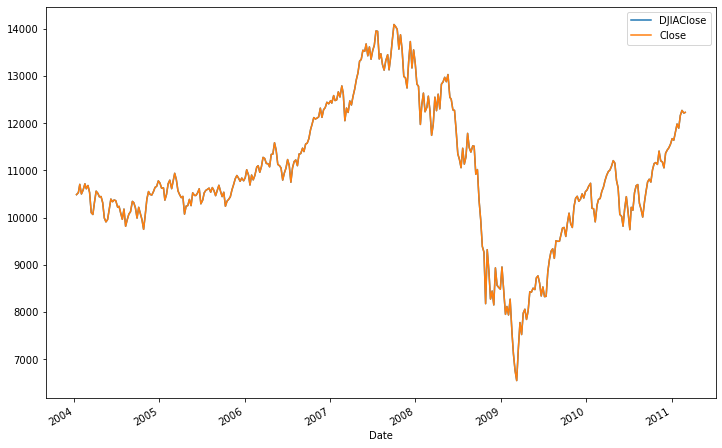

In [40]:
data[['DJIAClose', 'Close']].plot(figsize=(12,8));

We can also check the statistics of the differences in the values, as shown here:

In [41]:
(data['DJIAClose']-data['Close']).describe()

count    373.000000
mean      -0.004933
std        0.030032
min       -0.050000
25%       -0.030000
50%       -0.010000
75%        0.020000
max        0.040000
dtype: float64

The overall differences appear to be well less than one-tenth of a point and seem likely to be just from rounding errors.

One final check can examine the correlation of the two series of data:

In [42]:
data[['DJIAClose', 'Close']].corr()

,DJIAClose,Close
DJIAClose,1.0,1.0
Close,1.0,1.0


There is a perfect positive correlation. With this summarizing performed, we can have strong confidence that our data is prepared properly.

# Google Trends data
The authors provided their own version of Google Trends data for the term "debt". This is convenient, but we want to get our own Google Trends data. Unfortunately, there does not currently appear to be any API access to this data. But there are several ways that we can go about retrieving it. One way is to use the mechanize framework to automate a web-crawling process. Another way, which is what we will do, is to use the web portal to download the CSV for the data we want.

You can search in your browser for any term and get the associated trend data at http://www.google.com/trends/. The following command demonstrates the result of searching for the term debt:

<img src="https://raw.githubusercontent.com/safarini/Pictures/master/04.jpg" align="center" width="500" ></center>

This is pretty but not usable in our pandas application. Fortunately, if we go to the options button, we see the option Download as CSV, as shown in the following screenshot:

<img src="https://raw.githubusercontent.com/safarini/Pictures/master/05.jpg"  align="center" width="500" ></center>

You can download this for yourself. The data is also provided in the data folder of the samples for the book. The name of the file is trends_report_debt.csv. The following command shows the contents of the first few lines of the file:


In [46]:
# peek at the report for debt in the data folder
# head trends_report_debt.csv # on mac or linux
# type trends_report_debt.csv # on windows

This is not a particularly friendly CSV file, and we need to do a little bit of processing to extract the data properly. The following command reads the file and selects trend data in the range of dates we are working with:

In [53]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

In [58]:

with open("data/trends_report_debt.csv") as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv(
        StringIO(data_section),
        header=1, index_col='Week',
        converters={
            'Week': lambda x: pd.to_datetime(x.split(' ')[-1])
        }
    )
our_debt_trends = trends_data['2004-01-01':'2011-02-28'] \
                              .reset_index()
our_debt_trends[:5]

,Week,debt
0,2004-01-10,63
1,2004-01-17,60
2,2004-01-24,61
3,2004-01-31,63
4,2004-02-07,61


The numbers do not represent an actual count of the number of searches. It is simply a number provided by Google that you can use to compare with the other periods in the dataset to get a sense of how the volume changes. I'm sorry about the fact that they keep the good data to themselves, but there is enough here for us to work with.

We can start by combining this data into our dataset and check how well they conform. We will do the same as before and use pd.merge(). This time, we will join on the GoogleWE column on the left and the Week column on the right. The following command performs the merge, renames debt columns, and moves the indexes around:

In [59]:
final = pd.merge(data.reset_index(), our_debt_trends, 
                 left_on='GoogleWE', right_on='Week',
                 suffixes=['P', 'O'])
final.drop('Week', inplace=True, axis=1)
final.set_index('Date', inplace=True)
final[:5]

,GoogleWE,debtP,DJIAClose,Close,debtO
Date,,,,,
2004-01-12,2004-01-10,0.210000,10485.18,10485.2,63
2004-01-20,2004-01-17,0.210000,10528.66,10528.7,60
2004-01-26,2004-01-24,0.210000,10702.51,10702.5,61
2004-02-02,2004-01-31,0.213333,10499.18,10499.2,63
2004-02-09,2004-02-07,0.200000,10579.03,10579.0,61


We can create a new DataFrame with the normalized trend data from both the paper and our trend data (indexed by GoogleWE) and check to see how closely our trend data correlates with that used in the paper:

In [60]:
combined_trends = final[['GoogleWE', 'debtP', 'debtO']] \
                        .set_index('GoogleWE')
combined_trends[:5]

,debtP,debtO
GoogleWE,,
2004-01-10,0.210000,63
2004-01-17,0.210000,60
2004-01-24,0.210000,61
2004-01-31,0.213333,63
2004-02-07,0.200000,61


A correlation between these series shows that they are highly correlated. There is some difference as the data retrieved from Google is constantly renormalized and will cause small differences in the trend data that was captured earlier:

In [61]:
#correlation
combined_trends.corr()

,debtP,debtO
debtP,1.00000,0.95766
debtO,0.95766,1.00000


Plotting these two against each other, we can see they are very closely correlated:

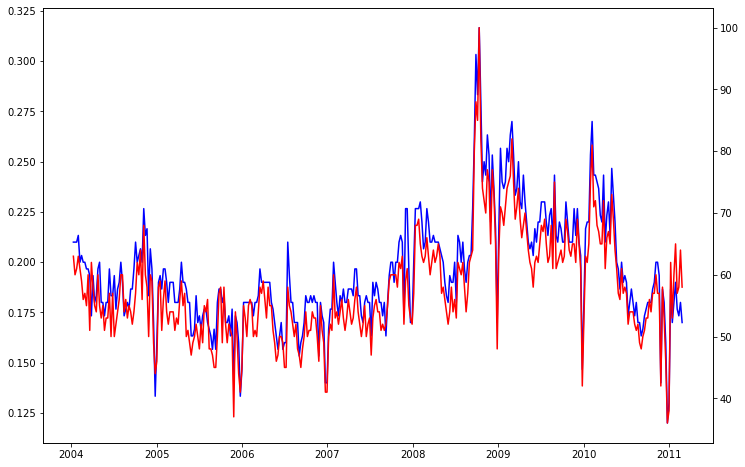

In [63]:
# visualize them together
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index,
         combined_trends.debtP, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index,
         combined_trends.debtO, color='r')
#plt.savefig('5104OS_06_05.png', bbox_inches='tight', dpi=300)
plt.show()


# Generating order signals
In the trading strategy that we will define, we want to be able to decide whether there is enough movement in the volume of searches on debt to go and execute a trade in the market that will make us a profit. The paper defines this threshold as though there is a higher search volume at the end of a Google Trends week than in the previous three-week average of the search volume, and then we will go short. If there is a decline, we will go long the following week.

The first thing we will need to do is reorganize our data by moving the GoogleWE dates into the index. We are going to make our decisions based upon these week-ending dates and use the Close price in an associated record as the basis for our trade as that price represents the Close price at the beginning of the next week. We also drop the DJIAClose column as it is redundant with Close:

In [64]:
base = final.reset_index().set_index('GoogleWE')
base.drop(['DJIAClose'], inplace=True, axis=1)
base[:3]

,Date,debtP,Close,debtO
GoogleWE,,,,
2004-01-10,2004-01-12,0.21,10485.2,63
2004-01-17,2004-01-20,0.21,10528.7,60
2004-01-24,2004-01-26,0.21,10702.5,61


We now need to calculate the moving average of the previous three weeks for each week. This is easily performed with pandas, and the following command will compute the moving average for both the trends provided in the paper and the data we just collected from Google Trends:

In [107]:
base['PMA']= base['debtP'].rolling(373, min_periods=4).mean()
base['OMA'] =base['debtO'].rolling(373, min_periods=4).mean()
base[:5]

,Date,debtP,Close,debtO,PMA,OMA
GoogleWE,,,,,,
2004-01-10,2004-01-12,0.210000,10485.2,63,NaN,NaN
2004-01-17,2004-01-20,0.210000,10528.7,60,NaN,NaN
2004-01-24,2004-01-26,0.210000,10702.5,61,NaN,NaN
2004-01-31,2004-02-02,0.213333,10499.2,63,0.210833,61.75
2004-02-07,2004-02-09,0.200000,10579.0,61,0.208667,61.60


The code shifts the calculated values by one week. This is because we need the three previous weeks' rolling mean at each week. Not shifting would include the current week in the average, and we want to make decisions on the prior three.

We now need to make a decision on how to execute based upon this information. This is referred to as generating order signals. The current organization of the data makes this simple to perform as we need to simply subtract the moving average from the current trend value for each week. If there is a decrease, we assign 1 as a value, and we assign -1 as a value in the opposite situation:

In [108]:
# calculate the order signals
# for the papers data
base['signal0'] = 0 # default to 0
base.loc[base.debtP > base.PMA, 'signal0'] = -1 
base.loc[base.debtP < base.PMA, 'signal0'] = 1

# and for our trend data
base['signal1'] = 0
base.loc[base.debtO > base.OMA, 'signal1'] = -1
base.loc[base.debtO < base.OMA, 'signal1'] = 1
base[['debtP', 'PMA', 'signal0', 'debtO', 'OMA', 'signal1']]

,debtP,PMA,signal0,debtO,OMA,signal1
GoogleWE,,,,,,
2004-01-10,0.210000,NaN,0,63,NaN,0
2004-01-17,0.210000,NaN,0,60,NaN,0
2004-01-24,0.210000,NaN,0,61,NaN,0
2004-01-31,0.213333,0.210833,-1,63,61.750000,-1
2004-02-07,0.200000,0.208667,1,61,61.600000,1
...,...,...,...,...,...,...
2011-01-29,0.190000,0.195610,1,65,57.601626,-1
2011-02-05,0.176667,0.195559,1,57,57.600000,1
2011-02-12,0.173333,0.195499,1,58,57.601078,-1


The trade signals based on our data are very similar but have slight differences due to the difference in the normalization of the data.

# Computing returns
Every week, we will reinvest the entirety of our portfolio. Because of this, the return on the investment over the week will be reflected simply by the percentage change in the DJIA between the close of the first Monday and the close of the following Monday, but with the factor taken into account on whether we went short or long.

We have already accounted for going short or long using -1 or 1 for the signal, respectively. Now, we just need to calculate the percentage change, shift it by one week back in time, and multiply it by the signal value. We shift the percentage change back one week as we want to multiply the signal value for the current week by the next percentage change from the next week:

In [109]:
base['PctChg'] = base.Close.pct_change().shift(-1)
base[['Close', 'PctChg', 'signal0', 'signal1']][:5]

,Close,PctChg,signal0,signal1
GoogleWE,,,,
2004-01-10,10485.2,0.004149,0,0
2004-01-17,10528.7,0.016507,0,0
2004-01-24,10702.5,-0.018996,0,0
2004-01-31,10499.2,0.007601,-1,-1
2004-02-07,10579.0,0.012846,1,1


To calculate the returns gained each week, we simply multiply the signal value by the percentage change (we will do this for both signals for both sets of trends):

In [110]:
base['ret0'] = base.PctChg * base.signal0
base['ret1'] = base.PctChg * base.signal1
base[['Close', 'PctChg', 'signal0', 'signal1', 
         'ret0', 'ret1']][:5]

,Close,PctChg,signal0,signal1,ret0,ret1
GoogleWE,,,,,,
2004-01-10,10485.2,0.004149,0,0,0.000000,0.000000
2004-01-17,10528.7,0.016507,0,0,0.000000,0.000000
2004-01-24,10702.5,-0.018996,0,0,-0.000000,-0.000000
2004-01-31,10499.2,0.007601,-1,-1,-0.007601,-0.007601
2004-02-07,10579.0,0.012846,1,1,0.012846,0.012846


# Cumulative returns and the result of the strategy
We now have all the weekly returns based upon our strategy. We can calculate the overall net percentage return of the investments at the end by applying the cumulative product of 1 + base.ret0 (the return of each week) and then subtracting 1 from the cumulative product:

In [111]:
base['cumret0'] = (1 + base.ret0).cumprod() - 1
base['cumret1'] = (1 + base.ret1).cumprod() - 1
base[['cumret0', 'cumret1']]

,cumret0,cumret1
GoogleWE,,
2004-01-10,0.000000,0.000000
2004-01-17,0.000000,0.000000
2004-01-24,0.000000,0.000000
2004-01-31,-0.007601,-0.007601
2004-02-07,0.005148,0.005148
...,...,...
2011-01-29,0.604762,0.323522
2011-02-05,0.618828,0.335123
2011-02-12,0.611518,0.341152


At the end of our run of this strategy, we can see that we have made a profit. We now plot the returns based on the data from the paper:

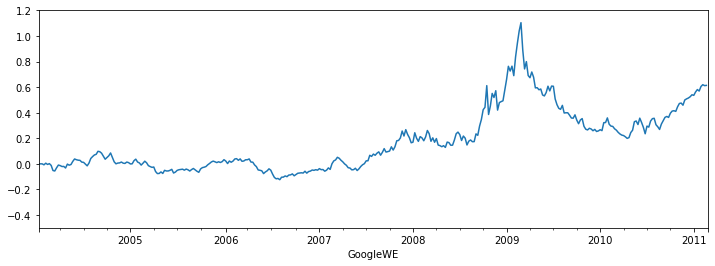

In [137]:
base['cumret0'].plot(figsize=(12,4), ylim=[-0.5,1.2]);

This shows that our implementation of the strategy produces a very similar result to that published in the paper. We only obtained a 271 percent increase in value compared to their stated return of 326 percent, but the curve almost identically follows the same path as theirs. This suggests that our strategy executes similarly to theirs although there must be some slight differences in the calculations of some of the decisions. The important thing is you learned a number of concepts in pandas.

When we used our own data from Google Trends, we still had gains but not to the extent they received using their trend data. We now plot the two sets of data using the following command:

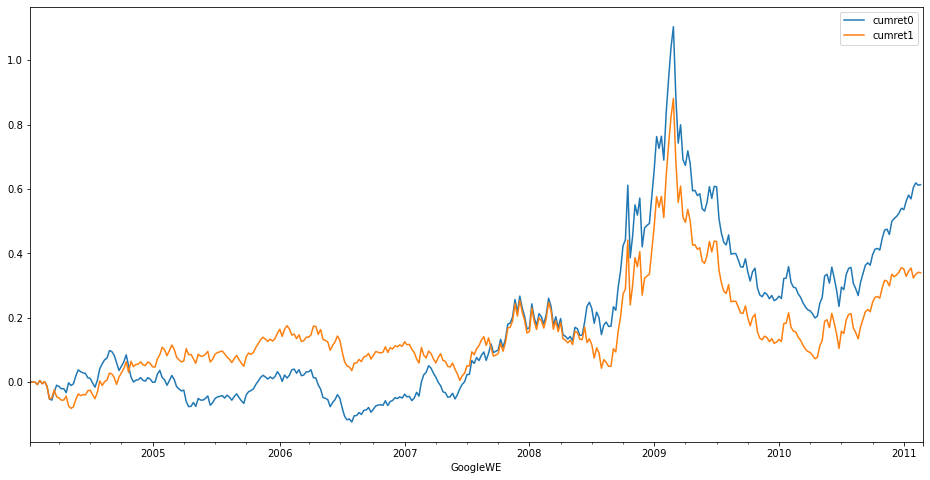

In [135]:
base[['cumret0', 'cumret1']].plot(figsize=(16,8));

Although the trend data we received from Google followed very similar paths, small differences in the data can be seen when examining the order signals that will make the accumulation of returns more modest. This is likely to be because there is an overall sensitivity around where the total change in volume of the search term is very close to 0, but the strategy still decides to execute one way or the other and causes returns to not grow as rapidly. But again, we are not analyzing the correctness of their results but seeing whether we can replicate the process and decision making using pandas.

# Summary
In this session, we took an in-depth look at collecting a type of social data and using it to see whether we could identify trends in the data that can be correlated with market movements in order to gain an advantage over the general movement of the market. We did this by reproducing results from a published paper, which concludes that it is possible. We were able to reproduce very similar results and you learned a general process of analyzing data and making decisions on trading in the market.

The best part of this is that during this process, you saw that pandas provides a very robust framework for financial time-series analysis as well as for the analysis of simple social data. You learned how to work with multiple time-series that have different frequencies and how to manipulate them to be able to have frequencies that can be aligned to be able to apply decisions made in one to execution in another. This included various concepts such as frequency conversion, grouping by year and day of week, generating signals based upon data, and shifting calculations back and forth to align properly to relate data at different periods to each other with simple pandas formulas.

But there is also a lot that we did not cover. Our strategy was based purely on historical data and can lead to a look-ahead bias. It also did not cover the effects that our trades may have on the actual market. It did not factor in transaction costs. Perhaps most significantly, we did not perform the simulation of alternative strategies.

In the upcoming sessions, we will dive into each of these concepts (and more). In the next session on algorithmic trading, we will start to look at more elaborate strategies for investing in the market where we do not have perfect knowledge, need to learn on the fly, and make decisions based on imperfect data.